In [1]:
import re
import math
from pprint import pprint
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'赣州', geoCoord:[114.93, 25.83]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
//{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [3]:
city_location = {}
# {
# city_name:  ()
# }

In [4]:
for line in coordination_source.split('\n'):
    if line.startswith('//'):
        continue
    if line.strip() == '':
        continue

    city = re.findall("name:'(\w+)'", line)[0]
    x_y = re.findall("ord:\[(\d+.\d+), (\d+.\d+)\]", line)[0]
    x_y = tuple(map(float, x_y))
    city_location[city] = x_y

pprint(city_location)

{'上海': (121.48, 31.22),
 '兰州': (103.73, 36.03),
 '北京': (116.46, 39.92),
 '南京': (118.78, 32.04),
 '南宁': (108.33, 22.84),
 '南昌': (115.89, 28.68),
 '合肥': (117.27, 31.86),
 '呼和浩特': (111.65, 40.82),
 '哈尔滨': (126.63, 45.75),
 '嘉峪关': (98.17, 39.47),
 '天津': (117.2, 39.13),
 '太原': (112.53, 37.87),
 '广州': (113.23, 23.16),
 '成都': (104.06, 30.67),
 '拉萨': (102.73, 25.04),
 '杭州': (120.19, 30.26),
 '武汉': (114.31, 30.52),
 '沈阳': (123.38, 41.8),
 '济南': (117.0, 36.65),
 '澳门': (113.54, 22.19),
 '石家庄': (114.48, 38.03),
 '福州': (119.3, 26.08),
 '西宁': (101.74, 36.56),
 '西安': (108.95, 34.27),
 '贵阳': (106.71, 26.57),
 '赣州': (114.93, 25.83),
 '郑州': (113.65, 34.76),
 '重庆': (106.54, 29.59),
 '银川': (106.27, 38.47),
 '长春': (125.35, 43.88),
 '长沙': (113.0, 28.21),
 '香港': (114.17, 22.28)}


In [5]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(
             math.radians(lat2)) * math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [6]:
def get_city_distance(city1, city2):
    return geo_distance(city_location[city1], city_location[city2])

In [7]:
get_city_distance('杭州', '赣州')

627.3562223956262

In [8]:
cities = list(city_location.keys())
print(cities)

['兰州', '嘉峪关', '西宁', '成都', '石家庄', '拉萨', '贵阳', '武汉', '郑州', '济南', '南京', '合肥', '杭州', '南昌', '赣州', '福州', '广州', '长沙', '沈阳', '长春', '哈尔滨', '太原', '西安', '北京', '上海', '重庆', '天津', '呼和浩特', '南宁', '银川', '香港', '澳门']


In [9]:
city_graph = nx.Graph()
city_graph.add_nodes_from(cities)

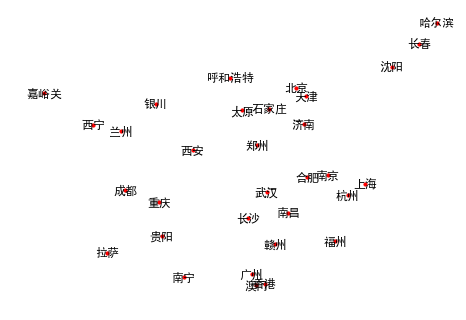

In [10]:
nx.draw(city_graph, city_location, with_labels=True, node_size=10)

In [11]:
from collections import defaultdict

In [12]:
cities_connection = defaultdict(list)
threshold = 710

In [13]:
# for c1 in cities:
#     for c2 in cities:
#         if c1 == c2: continue

#         if get_city_distance(c1, c2) < threshold:
#             cities_connection[c1].append(c2)

cities_connection = {
    c1: [
        c2 for c2 in cities
        if c1 != c2 and get_city_distance(c1, c2) < threshold
    ]
    for c1 in cities
}

In [14]:
pprint(cities_connection)

{'上海': ['济南', '南京', '合肥', '杭州', '南昌', '福州', '沈阳', '天津'],
 '兰州': ['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
 '北京': ['石家庄',
        '武汉',
        '郑州',
        '济南',
        '南京',
        '合肥',
        '杭州',
        '南昌',
        '赣州',
        '长沙',
        '太原',
        '天津',
        '呼和浩特'],
 '南京': ['石家庄',
        '武汉',
        '郑州',
        '济南',
        '合肥',
        '杭州',
        '南昌',
        '赣州',
        '福州',
        '长沙',
        '北京',
        '上海',
        '天津',
        '香港'],
 '南宁': ['兰州', '成都', '拉萨', '贵阳', '广州', '长沙', '西安', '重庆', '银川', '香港', '澳门'],
 '南昌': ['石家庄',
        '武汉',
        '郑州',
        '济南',
        '南京',
        '合肥',
        '杭州',
        '赣州',
        '福州',
        '广州',
        '长沙',
        '太原',
        '北京',
        '上海',
        '天津',
        '香港',
        '澳门'],
 '合肥': ['石家庄',
        '武汉',
        '郑州',
        '济南',
        '南京',
        '杭州',
        '南昌',
        '赣州',
        '福州',
        '广州',
        '长沙',
        '太原',
        '北京

In [15]:
cities_connection['赣州']

['石家庄',
 '武汉',
 '郑州',
 '济南',
 '南京',
 '合肥',
 '杭州',
 '南昌',
 '福州',
 '广州',
 '长沙',
 '太原',
 '北京',
 '天津',
 '香港',
 '澳门']

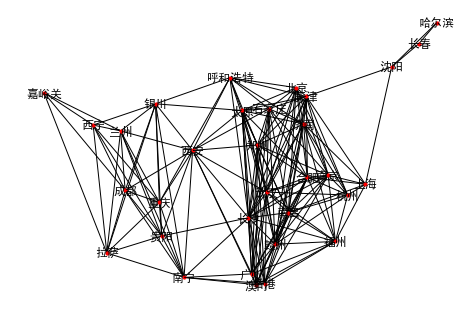

In [16]:
cities_connection_graph = nx.Graph(cities_connection)
nx.draw(cities_connection_graph, city_location, with_labels=True, node_size=10)

In [17]:
def is_goal(desitination):
    def _wrap(current_path):
        return current_path[-1] == desitination

    return _wrap


def search(graph, start, is_goal, search_stragegy):
    pathes = [[start]]
    seen = set()

    while pathes:
        path = pathes.pop(0)
        front_iter = path[-1]

        if front_iter in seen:
            continue
        successor = graph[front_iter]
        for city in successor:
            if city in path:
                continue
            new_path = path + [city]
            pathes.append(new_path)

            if is_goal(new_path):
                return new_path
        seen.add(front_iter)
        pathes = search_stragegy(pathes)

In [18]:
def sort_path(cmp_func, beam=-1):
    def _sorted(pathes):
        return sorted(pathes, key=cmp_func)[:beam]

    return _sorted


search(
    cities_connection,
    start='香港',
    is_goal=is_goal('北京'),
    search_stragegy=sort_path(len))

['香港', '武汉', '北京']

In [19]:
def get_path_distance(path):
    distance = 0
    for i, c in enumerate(path[:-1]):
        distance += get_city_distance(c, path[i + 1])
    return distance

In [20]:
search(
    cities_connection,
    start='香港',
    is_goal=is_goal('北京'),
    search_stragegy=sort_path(get_path_distance))

['香港', '赣州', '北京']